# Лабораторная работа 3

## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold

In [27]:
df = pd.read_csv("employee_data.csv")
df = df.dropna()

In [28]:
df = df.dropna()
df.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [29]:
df.shape

(1000, 7)

### Обучающая и тестовая выборка

In [34]:
df["active_lifestyle"]

0      5
1      5
2      1
3      6
4      2
      ..
995    7
996    2
997    7
998    7
999    9
Name: active_lifestyle, Length: 1000, dtype: int64

In [35]:
df["healthy_eating"]

0      5
1      3
2      8
3      3
4      6
      ..
995    7
996    1
997    9
998    6
999    4
Name: healthy_eating, Length: 1000, dtype: int64

In [36]:
myData = pd.DataFrame({"al": df["active_lifestyle"], "he": df["healthy_eating"], "salary": df["salary"]})
myData

,al,he,salary
0,5,5,2297
1,5,3,1134
2,1,8,4969
3,6,3,902
4,2,6,3574
...,...,...,...
995,7,7,2996
996,2,1,667
997,7,9,4158
998,7,6,2414


In [37]:
#С помощью метода train_test_split разделим выборку на обучающую и тестовую

data= np.array([[myData["al"].iloc[i], myData["he"].iloc[i]] for i in range(myData.shape[0])])
target= np.array(myData["salary"])
trainX, testX, trainY, testY = train_test_split(data, target, train_size=0.9, random_state=1)

In [38]:
testX

array([[2, 4],
       [8, 8],
       [7, 5],
       [5, 5],
       [1, 4],
       [8, 7],
       [9, 5],
       [6, 5],
       [8, 4],
       [9, 6],
       [7, 6],
       [5, 6],
       [6, 4],
       [3, 5],
       [8, 2],
       [8, 0],
       [7, 6],
       [6, 4],
       [6, 4],
       [2, 4],
       [6, 5],
       [6, 7],
       [6, 5],
       [6, 7],
       [4, 6],
       [9, 8],
       [5, 6],
       [5, 1],
       [3, 8],
       [8, 7],
       [5, 2],
       [6, 5],
       [7, 5],
       [4, 7],
       [5, 7],
       [3, 9],
       [8, 6],
       [5, 2],
       [7, 2],
       [0, 6],
       [4, 4],
       [8, 4],
       [9, 1],
       [7, 5],
       [8, 5],
       [6, 4],
       [5, 7],
       [3, 5],
       [3, 6],
       [7, 7],
       [7, 6],
       [7, 5],
       [4, 2],
       [4, 2],
       [6, 5],
       [8, 5],
       [6, 7],
       [7, 7],
       [4, 2],
       [7, 3],
       [5, 4],
       [9, 2],
       [3, 7],
       [8, 8],
       [5, 8],
       [6, 2],
       [7,

In [39]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(trainX, trainY)
pred3_1 = neigh.predict(testX)
pred3_2 = neigh.predict(trainX)
pred3_1 = [i for  i in pred3_1]
pred3_2 = [i for  i in pred3_2]

In [40]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(trainX, trainY)
pred10_1 = neigh.predict(testX)
pred10_2 = neigh.predict(trainX)
pred10_1 = [i for  i in pred10_1]
pred10_2 = [i for  i in pred10_2]

In [41]:
print("Истинные значения:")
for i in testY:
    print(i)

Истинные значения:
2411
3345
1833
2297
2643
2764
1369
2065
1020
1950
2414
2878
1484
2761
1243
2406
2414
1484
1484
2411
2065
3228
2065
3228
3110
3113
2878
1128
4505
2764
553
2065
1833
3691
3460
5086
2182
553
1011
4038
1948
1020
2056
1833
1601
1484
3460
2761
3342
2996
2414
1833
785
785
2065
1601
3228
2996
785
670
1716
1475
3923
3345
4041
779
1011
902
902
1020
785
3809
1598
2065
1481
2646
3460
1252
1710
1369
3923
4854
670
1950
2996
3342
2414
2065
2297
670
1252
1484
670
3574
1601
3577
2646
3228
3574
1252


In [42]:
print("Предсказания с гиперпараметром 3:")
for i in pred3_1:
    print(i)

Предсказания с гиперпараметром 3:
2411.0
3345.0
1833.0
2297.0
2643.0
2764.0
1369.0
2065.0
1020.0
1950.0
2414.0
2878.0
1484.0
2761.0
1243.0
2251.3333333333335
2414.0
1484.0
1484.0
2411.0
2065.0
3228.0
2065.0
3228.0
3110.0
3113.0
2878.0
1128.0
4505.0
2764.0
553.0
2065.0
1833.0
3691.0
3460.0
4815.0
2182.0
553.0
1011.0
4038.0
1948.0
1020.0
1978.6666666666667
1833.0
1601.0
1484.0
3460.0
2761.0
3342.0
2996.0
2414.0
1833.0
785.0
785.0
2065.0
1601.0
3228.0
2996.0
785.0
670.0
1716.0
1475.0
3923.0
3345.0
4041.0
779.0
1011.0
902.0
902.0
1020.0
785.0
3809.0
1598.0
2065.0
1520.0
2646.0
3460.0
1252.0
1516.0
1369.0
3923.0
5125.0
670.0
1950.0
2996.0
3342.0
2414.0
2065.0
2297.0
670.0
1252.0
1484.0
670.0
3574.0
1601.0
3577.0
2646.0
3228.0
3574.0
1252.0


In [43]:
print("Предсказания с гиперпараметром 10:")
for i in pred10_1:
    print(i)

Предсказания с гиперпараметром 10:
2573.8
3345.0
1833.0
2297.0
2643.0
2764.0
1369.0
2065.0
1020.0
1950.0
2414.0
2878.0
1484.0
2761.0
1219.8
1987.2
2414.0
1484.0
1484.0
2573.8
2065.0
3228.0
2065.0
3228.0
3110.0
3020.0
2878.0
979.4
4155.8
2764.0
553.0
2065.0
1833.0
3691.0
3460.0
4958.3
2182.0
553.0
907.3
3608.3
1948.0
1020.0
1719.1
1833.0
1601.0
1484.0
3460.0
2761.0
3283.9
2996.0
2414.0
1833.0
808.2
808.2
2065.0
1601.0
3228.0
2996.0
808.2
670.0
1716.0
1428.6
3923.0
3345.0
4041.0
779.0
907.3
902.0
902.0
1020.0
808.2
3809.0
1598.0
2065.0
1434.5
2646.0
3460.0
1252.0
1384.4
1369.0
3923.0
4830.8
670.0
1950.0
2996.0
3283.9
2414.0
2065.0
2297.0
670.0
1252.0
1484.0
670.0
3550.8
1601.0
3623.4
2646.0
3228.0
3550.8
1252.0


# Проверка качества модели

### Метрика Root mean squared error (RMSE)

In [44]:
myrmse3_1 = mean_squared_error(testY, pred3_1, squared=False)
myrmse3_2 = mean_squared_error(trainY, pred3_2, squared=False)
print("Для К=3:\t {}\t{}".format(myrmse3_2, myrmse3_1))

Для К=3:	 40.5946888820705	46.46947624217667


In [45]:
myrmse10_1 = mean_squared_error(testY, pred10_1, squared=False)
myrmse10_2 = mean_squared_error(trainY, pred10_2, squared=False)
print("Для К=3:\t {}\t{}".format(myrmse10_2, myrmse10_1))

Для К=3:	 97.30773932906536	91.68270065830302


In [46]:
rmse = []
rmse.append(myrmse10_2)
rmse.append(myrmse10_1)

### Коэффициент детерминации

In [47]:
r2_1 = r2_score(testY,pred3_1)
r2_2 = r2_score(trainY,pred3_2)
print("Для К=3:\t {}\t{}".format(r2_1, r2_2))

Для К=3:	 0.9980796508817324	0.9985918271940087


In [48]:
r2_1 = r2_score(testY,pred10_1)
r2_2 = r2_score(trainY,pred10_2)
print("Для К=10:\t {}\t{}".format(r2_1, r2_2))

Для К=10:	 0.9925248582853	0.9919088121403481


## Подбор гиперпараметра с помощью кросс-валидации

In [49]:
kf = KFold(n_splits=10)
r = np.array(range(1,24))
params = [{"n_neighbors": r}]
gs= GridSearchCV(KNeighborsRegressor(), params, cv=kf, scoring="neg_root_mean_squared_error")
gs.fit(trainX, trainY)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])}],
             scoring='neg_root_mean_squared_error')

Text(0.5, 1.0, 'Гиперпараметр при KFold()')

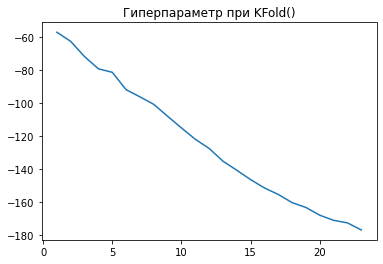

In [50]:
plt.plot(r, gs.cv_results_['mean_test_score'])
plt.title("Гиперпараметр при KFold()")

In [51]:
gs.best_estimator_.fit(trainX, trainY)
predGs1 = gs.best_estimator_.predict(testX)
predGs2 = gs.best_estimator_.predict(trainX)

In [52]:
rmse.append(mean_squared_error(testY, predGs1, squared=False))
rmse.append(mean_squared_error(trainY, predGs2, squared=False))
(mean_squared_error(testY, predGs1, squared=False), mean_squared_error(trainY, predGs2, squared=False))

(23.2, 0.0)

In [53]:
kf = RepeatedKFold(n_splits=10, n_repeats = 3)
r = np.array(range(1,24))
params = [{"n_neighbors": r}]
gs2= GridSearchCV(KNeighborsRegressor(), params, cv=kf, scoring="neg_root_mean_squared_error")
gs2.fit(trainX, trainY)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])}],
             scoring='neg_root_mean_squared_error')

Text(0.5, 1.0, 'Гиперпараметр при RepeatedKFold()')

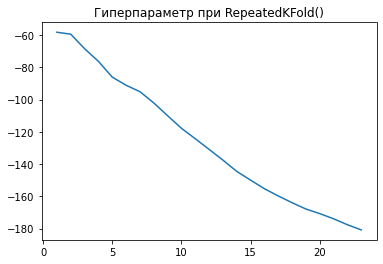

In [54]:
plt.plot(r, gs2.cv_results_['mean_test_score'])
plt.title("Гиперпараметр при RepeatedKFold()")

In [55]:
gs2.best_estimator_.fit(trainX, trainY)
predGs1 = gs2.best_estimator_.predict(testX)
predGs2 = gs2.best_estimator_.predict(trainX)

In [56]:
rmse.append(mean_squared_error(testY, predGs1, squared=False))
rmse.append(mean_squared_error(trainY, predGs2, squared=False))
(mean_squared_error(testY, predGs1, squared=False), mean_squared_error(trainY, predGs2, squared=False))

(23.2, 0.0)

## Сравним метрики качества исходной и оптимальных моделей

In [57]:
X = [i for i in range(len(rmse)//2)]
testRMSE = []
trainRMSE = []
for i in range(len(rmse)):
   if i%2==0:
        trainRMSE.append(rmse[i])
   else:
        testRMSE.append(rmse[i])

<AxesSubplot:title={'center':'Сравнение предсказания тестовой выборки'}, xlabel='Marks', ylabel='RMSE'>

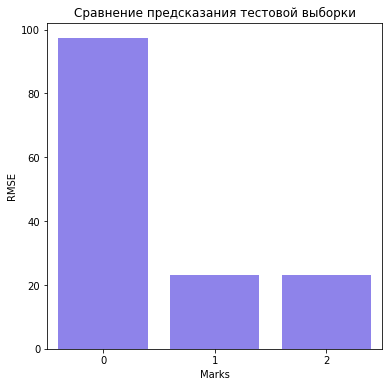

In [58]:
dataframe = pd.DataFrame({"Marks": X, "RMSE": trainRMSE})
fig, ax = plt.subplots(figsize=(6,6)) 
ax.title.set_text("Сравнение предсказания тестовой выборки")
sns.barplot(data=dataframe, y="RMSE", x="Marks", color="#8172fb")


<AxesSubplot:title={'center':'Сравнение предсказания обучающей выборки'}, xlabel='Marks', ylabel='RMSE'>

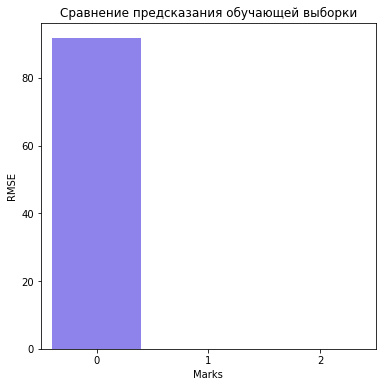

In [59]:
dataframe = pd.DataFrame({"Marks": X, "RMSE": testRMSE})
fig, ax = plt.subplots(figsize=(6,6)) 
ax.title.set_text("Сравнение предсказания обучающей выборки")
sns.barplot(data=dataframe, y="RMSE", x="Marks", color="#8172fb")